In [1]:
#%pip install gym_super_mario_bros==7.3.0 nes_py

In [1]:
import gym_super_mario_bros 
import os
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from nes_py.wrappers import JoypadSpace
from gym.wrappers import GrayScaleObservation
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from matplotlib import pyplot as plt

In [2]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
        
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

In [3]:
def make_env(env_id: str, rank: int, seed: int = 0):
    """
    Utility function for multiprocessed env.

    :param env_id: the environment ID
    :param num_env: the number of environments you wish to have in subprocesses
    :param seed: the inital seed for RNG
    :param rank: index of the subprocess
    """
    def _init():
        env = gym_super_mario_bros.make('SuperMarioBros-v0')
        env = JoypadSpace(env, SIMPLE_MOVEMENT)
        env = GrayScaleObservation(env, keep_dim=True)
        env.reset()
        return env
    return _init

In [4]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [5]:
callback = TrainAndLoggingCallback(check_freq=5000, save_path=CHECKPOINT_DIR)

In [6]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim=True)
#20% faster training with Multiprocessing
#env = DummyVecEnv([make_env('SuperMarioBros-v0', i) for i in range(4)])
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [21]:
obs = env.reset()

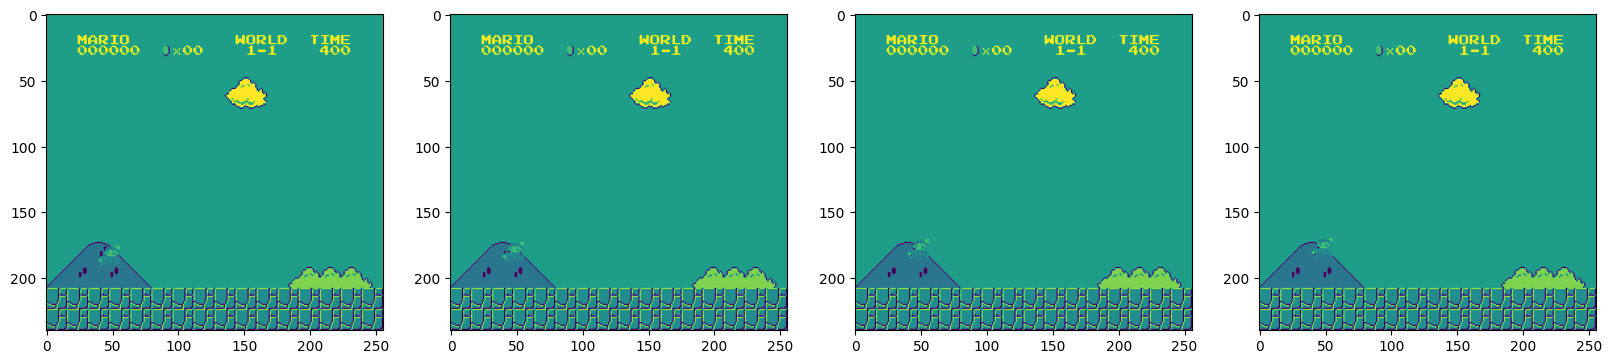

In [30]:
obs, reward, done, info = env.step([env.action_space.sample()])
plt.figure(figsize=(20,15))
for idx in range(obs.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(obs[0][:,:,idx])
plt.show()

In [34]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [35]:
model.learn(total_timesteps=30000, callback=callback)

Logging to ./logs/PPO_3


c:\Users\damem\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 53  |
|    iterations      | 1   |
|    time_elapsed    | 9   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 2             |
|    time_elapsed         | 20            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.9194675e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.000588     |
|    learning_rate        | 1e-06         |
|    loss                 | 185           |
|    n_updates            | 10            |
|    policy_gradient_loss | 0.000205      |
|    value_loss           | 655           |
-------------------------------------------
-----

In [67]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)
env.close()

c:\Users\damem\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\damem\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [4]:
done = True
for i in range(3000):
    if done:
        env.reset()
    obs, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()

c:\Users\damem\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
c:\Users\damem\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256
